## Statistics computed: Trade, investment and employment as aspects of globalisation 

Illustrating https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Trade,_investment_and_employment_as_aspects_of_globalisation


#### Import necessary packages and set global properties, such as countrynames for EU28 and corresponding labels

In [0]:
try:
  import google.colab
  pass
except:
  !pip install eurostatapiclient

In [0]:
## %%bash
## [[ ! -e /colabtools ]] && exit
## pip install eurostatapiclient

In [0]:
import pandas.compat as compat
from pandas.compat import map
from pandas.compat import lmap
from pandas.compat import u

In [0]:
from eurostatapiclient import EurostatAPIClient
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression

legend_properties = {'weight':'bold','size':'12'}
countries_names = {'AT':'Austria', 'BE':'Belgium', 'BG':'Bulgaria', 'CY': 'Cyprus', 'CZ': 'Czechia', 'DE': 'Germany', 'DK':
            'Denmark', 'EE':'Estonia', 'EL': 'Greece', 'ES':'Spain', 'FI':'Finland', 'FR':'France', 'HR':'Croatia', 
            'HU':'Hungary', 'IE':'Ireland', 'IT':'Italy', 'LT':'Lithuania', 'LU':'Luxembourg', 'LV':'Latvia', 'MT':
            'Malta', 'NL':'Netherlands', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 'SE':'Sweden', 'SI':'Slovenia',
            'SK':'Slovakia', 'UK':'United Kingdom', 'EU28': 'EU-28'}
countries_abbr = ['AT','BE','BG','CY','CZ','DE','DK','EE','EL','ES','FI',
                  'FR','HR','HU','IE','IT','LT','LU','LV','NV','NL','PL','PT','RO','SE','SI','SK','UK','MT', 'EU28']

#### Set up eurostatapiclinet by supplying settings, which will stay the same throught

In [0]:
#Set versions and formats, so far only the ones used here are availeable and call client
VERSION = 'v2.1'
FORMAT = 'json'
LANGUAGE = 'en'
client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)

#### Define  Functions for graphing

In [0]:
def subcategorybar(X,vals,lower,upper,distance,col,rot,width=0.6):
    ax.grid(axis='y', color='silver', linestyle='--', linewidth=1)
    n = len(vals)
    _X = np.arange(len(X))
    X_ticks=np.append(_X,_X[-1]+1)
    X_ticks=np.insert(X_ticks,_X[0],_X[0]-0.5)
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge", zorder=2, color=col[i])
        
    ax.set_xlim(left=X_ticks[0],right=X_ticks[-1]-0.5)
    ax.tick_params(axis='x', which='minor', length=0)    
    ax.set_xticks(_X, minor=True)
    ax.set_xticklabels(X, minor = True)
    ax.set_xticks(X_ticks-0.5, minor=False)
    ax.set_xticklabels('', minor=False)
    
    Y_ticks=range(lower,upper,distance)
    ax.set_yticks(Y_ticks)
    new_ticks= [str(i)+'%'for i in Y_ticks]
    new_ticks[0]='%'
    ax.set_yticklabels(new_ticks)
    ax.tick_params(axis='y', which='major', length=0)
    
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    for tick in ax.get_xticklabels(minor=True):
        tick.set_rotation(rot)


In [0]:
def hcatbar(Y,cats,lower,upper,col,labsize,barsize,width=0.6): 
    y_pos = np.arange(len(cats))
    if any(Y)>0:
        ax.barh(y_pos, Y,align='center', color= (Y < 0).map({True: col[0],
                                         False: col[1]}), zorder=2, height=barsize)
        ax.spines['left'].set_position('zero')
    else:
        ax.barh(y_pos, Y,align='center', color= col, zorder=2, height=barsize)
        
    ax.set_xlim(lower,upper)
    ax.set_yticks(y_pos)
    ax.tick_params(axis='y', which='major', labelsize=labsize, length=0)
    ax.set_yticklabels(cats)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    for n, label in enumerate(ax.yaxis.get_ticklabels()):
        label.set_horizontalalignment('left' if(Y[n]<0) else 'right')
        
    for n, tick in enumerate(ax.get_yaxis().get_major_ticks()):
        if(Y[n]<0):
            tick.set_pad(-4)

    ax.grid(axis='x', color='silver', linestyle='--', linewidth=1)
    ax.tick_params(axis='x', which='major', length=0)

#### Set parameters for data of interest and retrieve requested data. 
#### Clean and wrangle data so that it is usable, by filtering NANs and pivoting, so the final dataframe consists of two columns, which will be graphed as bars

In [0]:
params_df1 = {
    'na_item': ['P6','P7'],
    'sinceTimePeriod': '2012',
    'geo':'EU28',
    'unit':'PC_GDP'
}
dataframe_1 = client.get_dataset('nama_10_gdp', params=params_df1).to_dataframe()
params_df1.update({'lastTimePeriod': '2018'})
dataframe_1 = dataframe_1[dataframe_1.time <= params_df1['lastTimePeriod']]
dataframe_1 = dataframe_1.pivot(index='time', columns='na_item', values='values').reset_index().rename(columns={'P6':'Exports', 'P7':'Imports'})

#### Produce Graph 1. Use options as laid out in the function above. Additionally, define patches for custom legend and provide custom Title

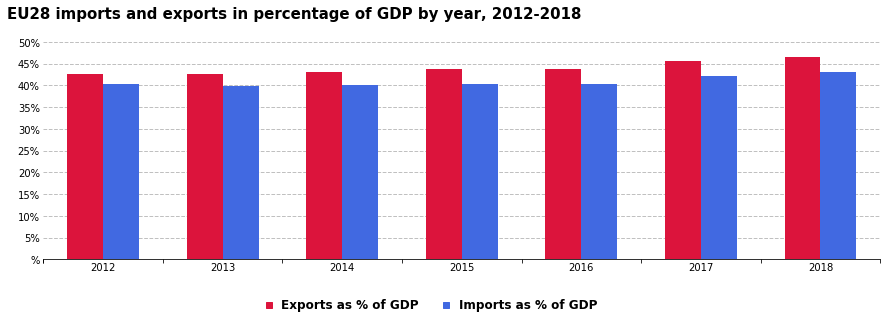

In [9]:
#make plot
fig, ax = plt.subplots(figsize=(15, 4))
subcategorybar(dataframe_1['time'], [dataframe_1['Exports'],dataframe_1['Imports']], 0,55,5, ['crimson','royalblue'],0)
red_patch = mpatches.Patch(color='crimson', label='Exports as % of GDP')
blue_patch = mpatches.Patch(color='royalblue', label='Imports as % of GDP')
leg= ax.legend(handles=[red_patch,blue_patch],frameon=False, loc=(0.26, -0.26), ncol=2, prop=legend_properties,labelspacing=0.1, handlelength=0.5)
for patch in leg.get_patches():
    patch.set_height(6)
ax.set_title('{} imports and exports in percentage of GDP by year, {}-{}'.format(params_df1['geo'],params_df1['sinceTimePeriod'],params_df1['lastTimePeriod']),
             fontsize=15,fontweight='bold',y=1.08, x=0.3)

plt.show()

#### Request and wrangle data so that it is usable, by pivoting dataframe, and sorting it for graphing

In [0]:
#df2 manipulation
params_df_2 = {
    'na_item': ['P6','P7'],
    'time': '2018',
    'geo':countries_abbr,
    'unit':'PC_GDP'
}

dataframe_2 = client.get_dataset('nama_10_gdp', params=params_df_2).to_dataframe()
dataframe_2 = dataframe_2.pivot(index='geo', columns='na_item', values='values').reset_index().rename(columns={'P6':'Exports', 'P7':'Imports'})
dataframe_2['geo']=dataframe_2['geo'].map(countries_names)
dataframe_2 = dataframe_2.sort_values(by='Exports', ascending=False)

#### Produce Graph 2. Add custom legend, title.

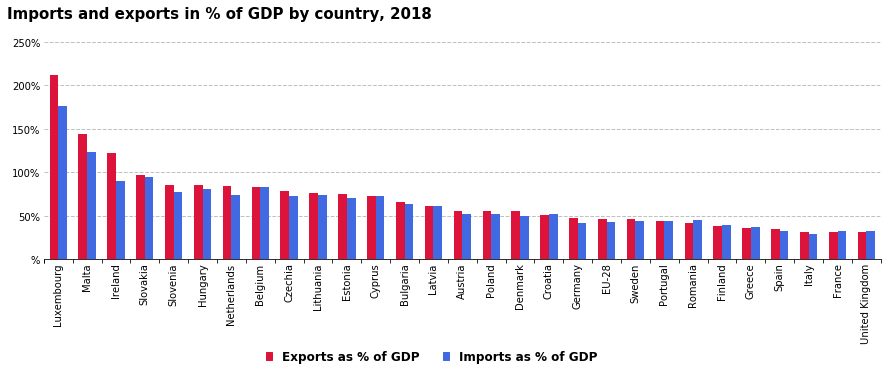

In [11]:
fig, ax = plt.subplots(figsize=(15, 4))
subcategorybar(dataframe_2['geo'], [dataframe_2['Exports'],dataframe_2['Imports']], 0,300,50, ['crimson','royalblue'],90)

#patches are set with the corresponding labels
red_patch = mpatches.Patch(color='crimson', label='Exports as % of GDP')
blue_patch = mpatches.Patch(color='royalblue', label='Imports as % of GDP')

leg= ax.legend(handles=[red_patch,blue_patch],frameon=False, loc=(0.26, -0.5), ncol=2, prop=legend_properties,labelspacing=0.1, handlelength=0.5)
    
ax.set_title('Imports and exports in % of GDP by country, {}'.format(params_df_2['time']),fontsize=15,fontweight='bold',y=1.08, x=0.21)

plt.show()


#### Request and wrangle data so that it is usable, by pivoting dataframe, and sorting it for graphing

In [0]:
params_df3={
    'na_item': ['P6','P7'],
    'time': '2018',
    'geo':[countries_abbr,'EU28'],
    'unit':'PC_GDP'
}

In [0]:
dataframe_3 = client.get_dataset('nama_10_gdp', params=params_df3).to_dataframe()
dataframe_3=dataframe_3.pivot(index='geo', columns='na_item', values='values').reset_index().rename(columns={'P6':'Exports', 'P7':'Imports'})
# issues with some pandas version, including on Google colab... ? we use methods for regular operations
dataframe_3['balance'] = dataframe_3['Exports'].sub(dataframe_3['Imports']).div(dataframe_3['Exports'])  
# dataframe_3['balance']=(dataframe_3['Exports'] - dataframe_3['Imports']) /dataframe_3['Exports']
dataframe_3['geo'] = dataframe_3['geo'].map(countries_names)
dataframe_3 = dataframe_3.sort_values(by='balance', ascending=True).reset_index(drop=True)

#### Produce Graph 3. Add custom legend, title.

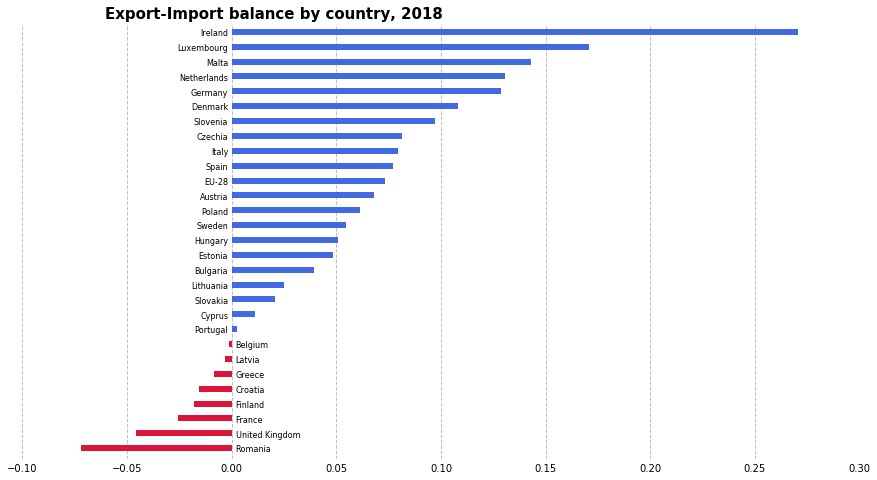

In [14]:
fig, ax = plt.subplots(figsize=(15, 8))
hcatbar(dataframe_3['balance'], dataframe_3['geo'], -0.1, 0.3, ['crimson', 'royalblue'], 8,0.4)
ax.set_ylim(-0.75,28.5)
ax.set_title('Export-Import balance by country, {}'.format(params_df3['time']),fontsize=15,fontweight='bold',y=1.00, x=0.3)
plt.show()


#### Request and wrangle data so that it is usable, by pivoting dataframe, and calculating quantities of interest to be graphed

In [0]:
params_df4_bop={
    'fdi_item': ['DO__D__F','DI__D__F'],
    'precision': '0',
    'geo':'EU28',
    'partner':'EXT_EU28',
    'stk_flow':['NO','NI'],
    'currency':'MIO_EUR',
    'entity':'TOTAL',
    'nace_r2':'FDI'
}

params_df4_gdp={
    'unit':'CP_MEUR',
    'na_item': 'B1G',
    'time':['2013','2014','2015','2016','2017'],
    'geo':'EU28',
    'nace_r2':'TOTAL'
}

In [0]:
dataframe_4_bop = client.get_dataset('bop_fdi6_pos', params=params_df4_bop).to_dataframe().dropna()
dataframe_4_gdp = client.get_dataset('nama_10_a64', params=params_df4_gdp).to_dataframe()
dataframe_4 = dataframe_4_bop.merge(dataframe_4_gdp[['values','time']],how='left', left_on='time', right_on='time')
dataframe_4['per_gdp'] = dataframe_4['values_x'].div(dataframe_4['values_y']).apply(lambda x: x*100)  
# dataframe_4['per_gdp'] = (dataframe_4['values_x']/dataframe_4['values_y'])*100
dataframe_4 = dataframe_4.pivot(index='time', columns='stk_flow', values='per_gdp').reset_index().rename(columns={'NI':'Inward', 'NO':'Outward'})

#### Produce Graph 4. Add custom legend, title.

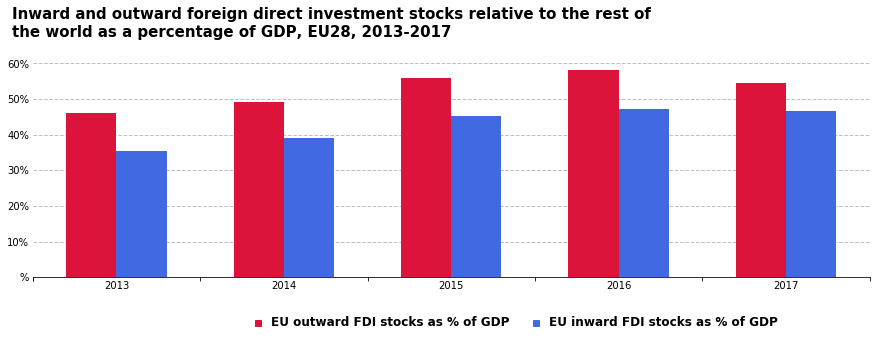

In [17]:
#make plot
fig, ax = plt.subplots(figsize=(15, 4))
subcategorybar(dataframe_4['time'], [dataframe_4['Outward'],dataframe_4['Inward']], 0,70,10, ['crimson','royalblue'],0)
red_patch = mpatches.Patch(color='crimson', label='EU outward FDI stocks as % of GDP')
blue_patch = mpatches.Patch(color='royalblue', label='EU inward FDI stocks as % of GDP')
leg= ax.legend(handles=[red_patch,blue_patch],frameon=False, loc=(0.26, -0.26), ncol=2, prop=legend_properties,labelspacing=0.1, handlelength=0.5)
for patch in leg.get_patches():
    patch.set_height(6)
ax.set_title('Inward and outward foreign direct investment stocks relative to the rest of \nthe world as a percentage of GDP, {}, {}-{}'.format(params_df4_gdp['geo'],min(params_df4_gdp['time']),max(params_df4_gdp['time'])),
                                                                                                                                                fontsize=15,fontweight='bold',y=1.08, x=-0.025, loc='left')

plt.show()

#### Request and wrangle data so that it is usable, by pivoting dataframe, and calculating quantities of interest to be graphed, additionally sort out outliers as defined in source graphs

In [0]:
params_df5_bop={
    'fdi_item': ['DO__D__F','DI__D__F'],
    'precision': '0',
    'geo':countries_abbr,
    'partner':'WRL_REST',
    'stk_flow':['NO','NI'],
    'currency':'MIO_EUR',
    'time':'2017',
    'entity':'TOTAL',
    'nace_r2':'FDI'
}

params_df5_gdp={
    'unit':'CP_MEUR',
    'na_item': 'B1G',
    'time':'2017',
    'geo':countries_abbr,
    'nace_r2':'TOTAL'
}

In [0]:
dataframe_5_bop = client.get_dataset('bop_fdi6_pos', params=params_df5_bop).to_dataframe().dropna()
dataframe_5_gdp = client.get_dataset('nama_10_a64', params=params_df5_gdp).to_dataframe()
dataframe_5 = dataframe_5_bop.merge(dataframe_5_gdp[['values','geo']],how='left', left_on='geo', right_on='geo')
dataframe_5['per_gdp'] = dataframe_5['values_x'].div(dataframe_5['values_y']).apply(lambda x: x*100)  
# dataframe_5['per_gdp'] = (dataframe_5['values_x']/dataframe_5['values_y'])*100
dataframe_5 = dataframe_5.pivot(index='geo', columns='stk_flow', values='per_gdp').reset_index().rename(columns={'NI':'Inward', 'NO':'Outward'})
dataframe_6 = dataframe_5
outlier = dataframe_5.loc[dataframe_5['geo'].isin(['IE','MT','CY','LU','NL'])]
dataframe_5 = dataframe_5.loc[dataframe_5['geo'].isin(['IE','MT','CY','LU','NL','EU28'])==False].reset_index()

#### Produce Graph 5. Emulate style manually and add labels to observations. In addition, add a linear approximation for purposes of data exploration.

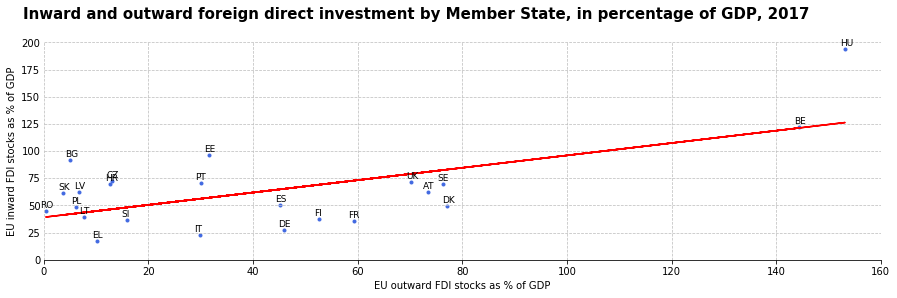

In [20]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.grid(axis='y', color='silver', linestyle='--', linewidth=0.75)
ax.grid(axis='x', color='silver', linestyle='--', linewidth=0.75)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(left=0,right=160)
ax.set_ylim(0,200)

ax.tick_params(axis='y', which='major', length=0)

for i,type in enumerate(dataframe_5['geo']):
    x = dataframe_5['Outward'][i]
    y = dataframe_5['Inward'][i]
    ax.scatter(x, y, marker='.', color='royalblue')
    ax.text(x-1, y+3, type, fontsize=9)

    
z = np.polyfit(dataframe_5['Outward'], dataframe_5['Inward'], 1)
p = np.poly1d(z)
plt.plot(dataframe_5['Outward'],p(dataframe_5['Outward']),"r")

ax.set_title('Inward and outward foreign direct investment by Member State, in percentage of GDP, {}'.format(params_df5_gdp['time']),
             fontsize=15,fontweight='bold',y=1.08, x=-0.025, loc='left')
plt.xlabel('EU outward FDI stocks as % of GDP')
plt.ylabel('EU inward FDI stocks as % of GDP')

plt.show()

#### Request and wrangle data so that it is usable, by pivoting dataframe

In [0]:
dataframe_6['balance'] = dataframe_6['Outward'].div(dataframe_6['Inward']).apply(lambda x: x-1)
# dataframe_6['balance'] = (dataframe_6['Outward']/dataframe_6['Inward'])-1
dataframe_6['geo'] = dataframe_6['geo'].map(countries_names)
dataframe_6 = dataframe_6.sort_values(by='balance', ascending=True).reset_index(drop=True)

#### Produce Graph 6. Add custom legend, title.

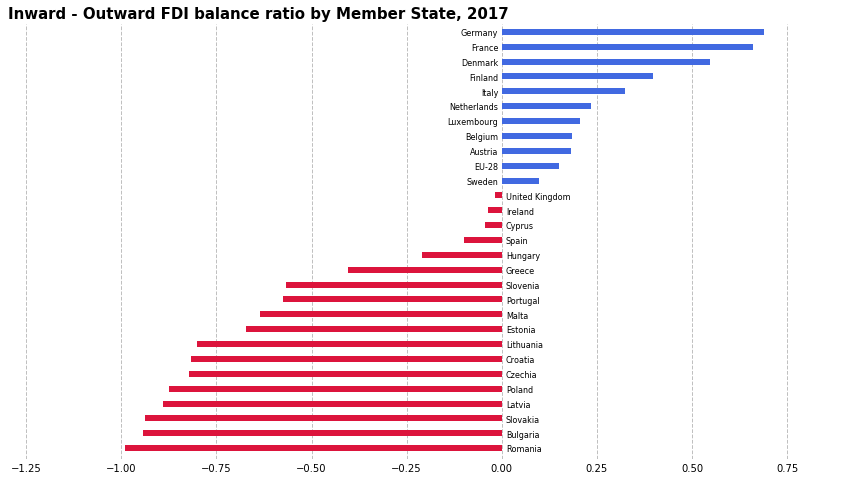

In [22]:
fig, ax = plt.subplots(figsize=(15, 8))
hcatbar(dataframe_6['balance'], dataframe_6['geo'], -1.20, 1, ['crimson', 'royalblue'], 8,0.4)
ax.set_ylim(-0.75,28.5)
ax.set_xlim(-1.3,0.9)
ax.set_title('Inward - Outward FDI balance ratio by Member State, {}'.format(params_df5_gdp['time']),
             fontsize=15,fontweight='bold',y=1.00, x=0.3)
plt.show()

#### Request and wrangle data so that it is usable, by pivoting dataframe and calculating quantities of interest to be graphed

In [0]:
params_df7={
    'precision':1,
    'geo':'EU28',
    'indic_sb':'V16110',
    'time':['2013','2014','2015','2016'],
    'c_ctrl':['EXT_EU28','WORLD'],
    'nace_r2':'B-N_S95_X_K'
}

In [0]:
dataframe_7 = client.get_dataset('fats_g1a_08', params=params_df7).to_dataframe()
dataframe_7 = dataframe_7.pivot(index='time', columns='c_ctrl', values='values').reset_index()
dataframe_7['perc'] = dataframe_7['EXT_EU28'].div(dataframe_7['WORLD']).apply(lambda x : round(x*100,2))
# dataframe_7['perc'] = round(((dataframe_7['EXT_EU28']/dataframe_7['WORLD'])*100),2)

#### Produce Graph 7. Add custom legend, title, insert percentage labels above the bars.

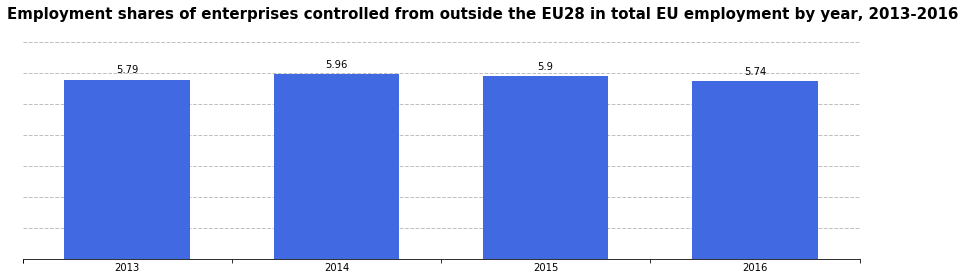

In [25]:
fig, ax = plt.subplots(figsize=(15, 4))
subcategorybar(dataframe_7['time'], [dataframe_7['perc']], 0,8,1, ['royalblue'],0)
ax.set_title('Employment shares of enterprises controlled from outside the {} in total EU employment by year, {}-{}'.format(params_df7['geo'],min(params_df7['time']),max(params_df7['time'])),
             fontsize=15,fontweight='bold',y=1.08, x=0.55)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='y', which='major', length=0)
ax.set_yticklabels('', minor=False)

for p in ax.patches: ax.annotate(p.get_height(), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

#### Request and wrangle data so that it is usable, by pivoting dataframe and calculating quantities of interest to be graphed, mapping countrynames and sorting

In [0]:
params_df8={
    'precision':1,
    'geo':countries_abbr,
    'indic_sb':'V16110',
    'time':'2016',
    'c_ctrl':['WRL_X_REP','WORLD'],
    'nace_r2':'B-N_S95_X_K'
}

In [0]:
dataframe_8 = client.get_dataset('fats_g1a_08', params=params_df8).to_dataframe()
dataframe_8 = dataframe_8.pivot(index='geo', columns='c_ctrl', values='values').reset_index()
dataframe_8['perc'] = dataframe_8['WRL_X_REP'].div(dataframe_8['WORLD']).apply(lambda x: x*100)
#dataframe_8['perc'] = (dataframe_8['WRL_X_REP']/dataframe_8['WORLD'])*100
dataframe_8['geo'] = dataframe_8['geo'].map(countries_names)
dataframe_8 = dataframe_8.sort_values(by='perc', ascending=True).reset_index(drop=True)

#### Produce Graph 8. Add custom legend, title, color EU28 bar blue.

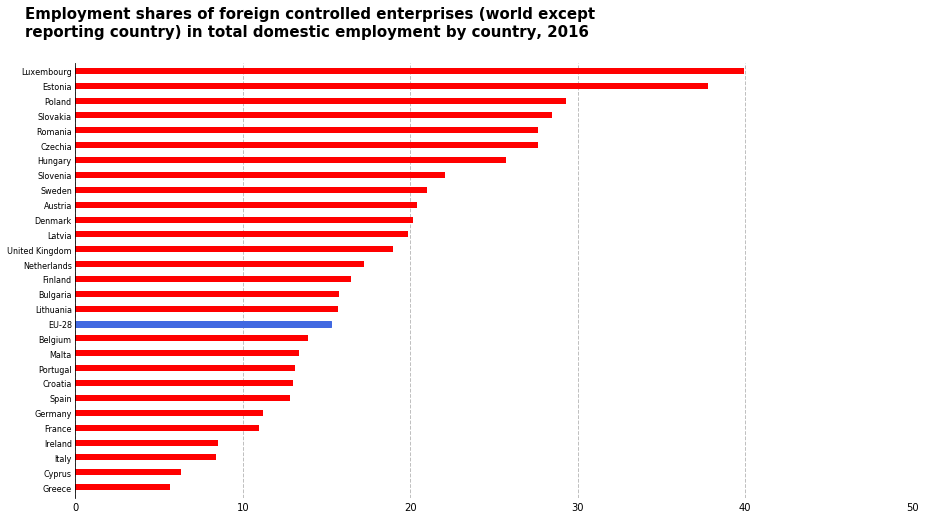

In [28]:
fig, ax = plt.subplots(figsize=(15, 8))
hcatbar(dataframe_8['perc'], dataframe_8['geo'], 0, 50, 'crimson', 8,0.4)
ax.set_ylim(-0.75,28.5)
ax.set_title('Employment shares of foreign controlled enterprises (world except \nreporting country) in total domestic employment by country, {}'.format(params_df8['time']),
             fontsize=15,fontweight='bold',y=1.05, x=-0.06, loc='left')
ax.spines['left'].set_visible(True)
ax.get_children()[11].set_color('royalblue')
plt.show()